1. Bibliotecas 

In [230]:
# Importar as bibliotecas
# Análise Exploratória de dados 
import pandas as pd  
import numpy as np

# Visualização
from matplotlib import pyplot as plt  
import seaborn as sns 
 
# Pré-processamento e modelos    
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling  import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


pd.set_option("display.max_columns",None) # mostrar todas as colunas 
pd.set_option("display.max_rows",None) # mostrar todas as linhas

2. Entendimento dos dados (Explorar os conjuntos de dados)
- 2.1. Importar os conjuntos de dados;
- 2.2. Informações sobre os conjuntos de dados;
- 2.3. Estatística das variáveis.

2.1. Importar o conjunto de dado (dataset) 

2.1.1. Importar o conjunto de dados (dataset) nomeado Abandono_clientes (dados de treino)

In [107]:
df = pd.read_csv("DF Cientista de dados Jr.csv") 

In [108]:
df.head() # visualizar as informações contidas no conjunto de dados (5 primeiras linhas)

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [109]:
display(df.dtypes) # tipo de cada coluna do conjunto de dados de treino

Idade        int64
Sexo        object
IMC        float64
Filhos       int64
Fumante     object
Regiao      object
Custos     float64
dtype: object

No conjunto de dados acima, cada coluna representa uma informação/variável sobre a pessoa.

Questão 1. O que significa cada variável? Qual é o tipo de cada variável?

a) Variáveis numéricas (int64 ou float64)
- Idade: idade da pessoa (int64)
- IMC: Indice de massa corporal da pessoa (float64)
- Filhos: número de filhos que a pessoa tem (int64)
- Custos: custos que a pessoa tem (float64)

b) Variáveis categóricas (object)
- Sexo: gênero da pessoa (female = feminino e male = masculino)
- Região: localização da pessoa
- Fumante: se a pessoa é fumante? no = não e yes = sim

Questão 2. Qual a quantidade de variáveis e pessoas?

In [110]:
print("Número de variáveis:\t {}".format(df.shape[1]))
print("Número de pessoas:\t {}".format(df.shape[0]))

Número de variáveis:	 7
Número de pessoas:	 1338


Questão 3. Existem valores ausentes no conjunto de dados? Qual a quantidade de valores únicos em cada variável?

In [111]:
pd.DataFrame({"valores Ausentes":df.isna().mean(),
              "Valores Únicos":df.nunique()})

,valores Ausentes,Valores Únicos
Idade,0.0,47
Sexo,0.0,2
IMC,0.0,548
Filhos,0.0,6
Fumante,0.0,2
Regiao,0.0,4
Custos,0.0,1337


- Não existem valores ausentes no conjunto de dados
- E quanto aos valores únicos é sempre bom verificar especialmente para as variáveis "Sexo" e "Fumante" que precisam conter dois tipos de informação. Logo, a quantidade de valores únicos (ou seja, total unitário) precisar ser 2. 


Questão 4. Existem valores duplicados? 

In [112]:
novo_df = df.drop_duplicates() # remover as linhas duplicadas
duplicadas_df = novo_df[novo_df.duplicated()] # calcular o total de linhas duplicadas
print(f"Total de linhas duplicadas: {len(duplicadas_df)}")

Total de linhas duplicadas: 0


Não! O conjunto de dado não possui valores duplicados

Questão 5. Existem outliers (valores discrepantes)?

<AxesSubplot:xlabel='Idade'>

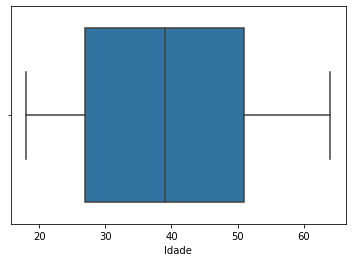

In [113]:
# Variáveis numéricas
sns.boxplot(x="Idade",data=df)

<AxesSubplot:xlabel='IMC'>

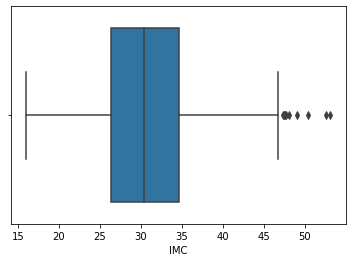

In [114]:
sns.boxplot(x="IMC",data=df)

<AxesSubplot:xlabel='Filhos'>

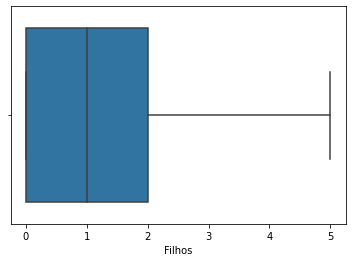

In [115]:
sns.boxplot(x="Filhos",data=df)

C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Custos'>

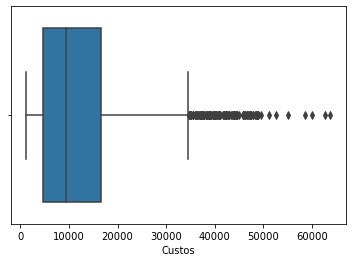

In [116]:
sns.boxplot("Custos",data=df)

Observação geral sobre a presença de outliers: 
- Idade e Filhos não possuem outliers;
- IMC e Custos possuem outliers. 

Outliers podem causar ruídos na análise de dados, ou seja, viesar a(s) análise(s) subsequentes. Então, o que fazer com os outliers?

Listo algumas estratégias:

• entrar em contato com a equipe responsável pela coleta dos dados para verificar se tais outliers possam ser devido algum erro durante o processo de coleta dos dados. Caso afirmativo, os outliers seriam arrumados;


• remover os outliers. Isso implica perder linha(s) inteira(s) do conjunto de dados. No presente projeto seria perder "pessoas". Temos 1338 pessoas e a variável alvo (fumante) está desbalanceada (conforme mostrado na etapa posterior), assim, existe o risco de aumentar ainda mais esse desbalanceamento. Portanto, seria preciso avaliar o impacto da remoção dos outliers


• substituir os valores dos outliers por um valor de uma medida de estatística descritiva (por exemplo, média ou moda). Ou também alterar o valor do(s) outlier(s) usando os valores da barra superior e inferior, ou seja, outlier(s) acima da barra superior receberiam o valor da barra superior e outlier(s) abaixo da barra inferior receberiam o valor da barra inferior 


• Neste presente projeto, inicialmente, vou continuar com os outliers. Partindo da seguinte premissa: "objetivo é buscar padrões e/ou fazer previsões aos quais não se tem nenhuma informação a priori". Porém, se os modelos apresentarem performances ruins, retorno nesta questão

2.3. Estatísticas das variáveis

2.3.1. Variável alvo (também conhecida como target, y ou resposta) no conjunto de dados. Fumante é a variável alvo e possui dois valores: 
- "no" pessoa não é fumante
- "yes" pessoa é fumante

2.3.1.1. Estatística descritiva da variável alvo

In [117]:
y=df["Fumante"]

Questão 6. Como se comporta a variável alvo? 

In [118]:
# Quantidade de pessoas que são fumantes
y_1=sum(y=="yes")
print("Quantidade de pessoas que são fumantes: {}".format(y_1))

Quantidade de pessoas que são fumantes: 274


In [119]:
# Quantidade de pessoas que não são fumantes
y_0=sum(y=="no")
print("Quantidade de pessoas que não são fumantes: {}".format(y_0))

Quantidade de pessoas que não são fumantes: 1064


In [120]:
# Proporção de pessoas que são fumantes
prop_y_1=sum(y=="yes")*100/y.shape[0]
print("Porcentagem de pessoas que são fumantes: {}".format(prop_y_1))

# Proporção de pessoas que não são fumantes
prop_y_0=sum(y=="no")*100/y.shape[0]
print("Porcentagem de pessoas que não são fumantes: {}".format(prop_y_0))

Porcentagem de pessoas que são fumantes: 20.47832585949178
Porcentagem de pessoas que não são fumantes: 79.52167414050822


In [121]:
# Criar um dataframe com os dados acima
y_df=pd.DataFrame([["Não",1064,79.52],["Sim",274,20.48]],index=range(0,2),columns=["Fumante","Quantidade de Pessoas (N)", "Porcentagem de Pessoas (%)"])
display(y_df)

,Fumante,Quantidade de Pessoas (N),Porcentagem de Pessoas (%)
0,Não,1064,79.52
1,Sim,274,20.48


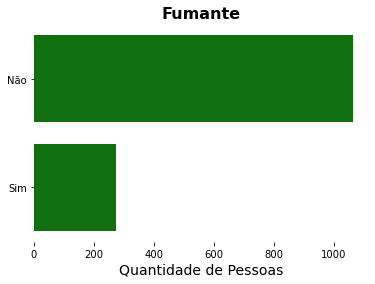

In [122]:
# Mostrar os dados da variável alvo em um gráfico de barras  
sns.set_color_codes("dark")
g = sns.barplot(x="Quantidade de Pessoas (N)", y="Fumante",data=y_df, color="green")
g.axes.set_title("Fumante", fontsize=16,color="black",alpha=3,weight="bold")
g.set_xlabel("Quantidade de Pessoas", size = 14,color="black")
g.set_ylabel("")
sns.despine(left=True, bottom=True)
plt.show()

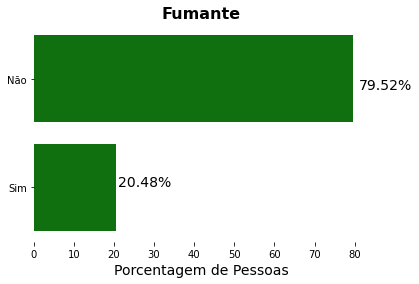

In [123]:
# Mostrar os dados da variável alvo em um gráfico de barras
sns.set_color_codes("dark")
g = sns.barplot(x="Porcentagem de Pessoas (%)", y="Fumante",data=y_df, color="green")
g.axes.set_title("Fumante", fontsize=16,color="black",alpha=3,weight="bold")
g.set_xlabel("Porcentagem de Pessoas", size = 14,color="black")
g.set_ylabel("")
plt.text(81,0.1,"79.52%",fontsize=14)
plt.text(21,0.99,"20.48%",fontsize=14)         
sns.despine(left=True, bottom=True)
plt.show()

Através das informações acima podemos verificar que a maioria das pessoas não são fumantes.  Simplesmente, em cada dez pessoas, dois são fumantes. Além disso, está evidente que o conjunto de dados está desbalanceado. 

Consequências de dados desbalanceados na construção de um modelo de aprendizado de máquina (machine learning):

O modelo terá uma tendência a dar muitos "alarmes falsos". Ou seja, na prática o modelo irá responder muito para a classe majoritária (não fumante), mas terá um desempenho inferior para a classe minoritária (fumante). Logo, esse fato merece atenção na hora do pré-processamento dos dados.


Questão 7. Quem são as outras variáveis?

São as variáveis explanatórias (explicativas ou X)

2.3.2. Variáveis X 

In [124]:
X=df.drop(columns=["Fumante"])

In [125]:
X.head()

,Idade,Sexo,IMC,Filhos,Regiao,Custos
0,19,female,27.900,0,southwest,16884.92400
1,18,male,33.770,1,southeast,1725.55230
2,28,male,33.000,3,southeast,4449.46200
3,33,male,22.705,0,northwest,21984.47061
4,32,male,28.880,0,northwest,3866.85520


Questão 8. Qual o comportamento geral das variáveis X?   

2.3.2.1. Análise univariada das variáveis X que são numéricas

In [126]:
X_numericas=X.select_dtypes(exclude=["object"])

In [127]:
X_numericas.head()

,Idade,IMC,Filhos,Custos
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [128]:
X_numericas.describe()

,Idade,IMC,Filhos,Custos
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Acima constam o número de observações (count), média (mean), desvio padrão (std), valor máximo (max) e minimo (min) e os quartis (25%, 50% e 75%) para cada uma das variáveis X numéricas
- As variáveis possuem escalas de grandezas distintas. Esse fato merece atenção na hora da etapa de pré-processamento

2.3.2.2. Análise univariada das variáveis X que são categóricas

In [129]:
X_categoricas=X.select_dtypes(include=["object"])

In [130]:
X_categoricas.head()

,Sexo,Regiao
0,female,southwest
1,male,southeast
2,male,southeast
3,male,northwest
4,male,northwest


In [131]:
X_categoricas.describe(include=object)

,Sexo,Regiao
count,1338,1338
unique,2,4
top,male,southeast
freq,676,364


C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Fabi Borges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


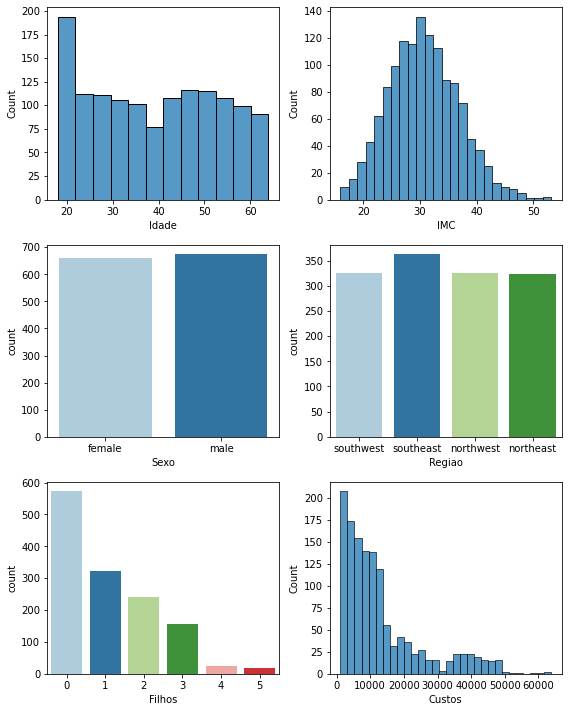

In [132]:
fig, ax = plt.subplots(3,2, figsize = (8,10)) # visualizar as variáveis X
sns.histplot(X_numericas["Idade"], palette = 'Paired', ax = ax[0][0])
sns.histplot(X_numericas["IMC"], palette = 'Paired', ax = ax[0][1])
sns.countplot(X_categoricas["Sexo"], palette = "Paired", ax = ax[1][0])
sns.countplot(X_categoricas["Regiao"], palette = "Paired", ax = ax[1][1])
sns.countplot(X_numericas["Filhos"], palette = 'Paired', ax = ax[2][0])
sns.histplot(X_numericas["Custos"], palette = 'Paired', ax = ax[2][1])
plt.tight_layout()
plt.show()

2.3.2.3. Análise das variáveis X considerando a variável alvo 

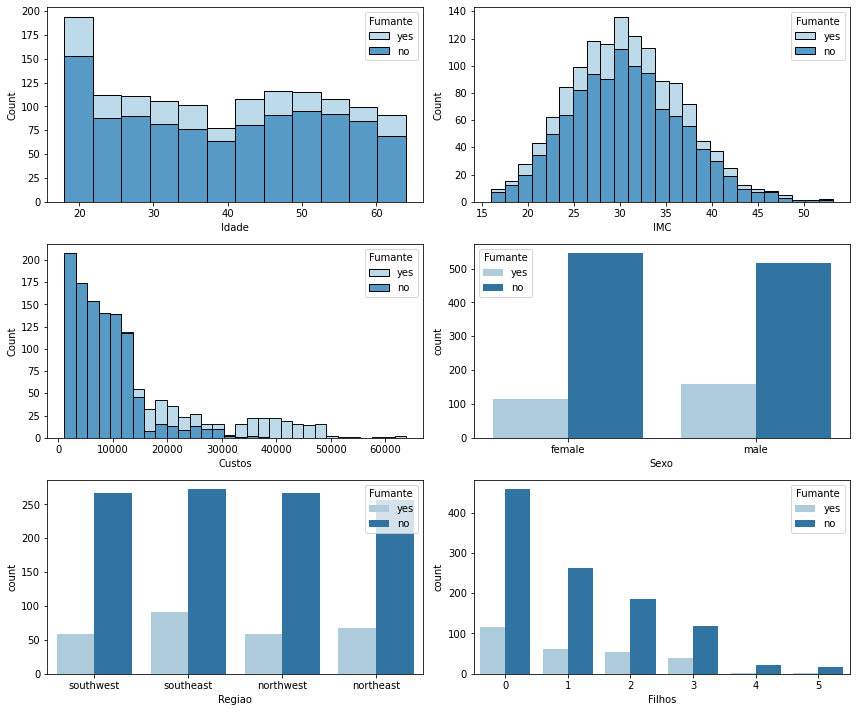

In [133]:
fig, ax = plt.subplots(3,2, figsize = (12,10))
sns.histplot(hue= 'Fumante', x= 'Idade', multiple='stack', data = df, palette = 'Paired', ax = ax[0][0])
sns.histplot(hue= 'Fumante', x= 'IMC', multiple='stack', data = df, palette = 'Paired', ax = ax[0][1])
sns.histplot(hue= 'Fumante', x= 'Custos', multiple='stack', data = df, palette = 'Paired', ax = ax[1][0])
sns.countplot(x= 'Sexo', hue= 'Fumante', data = df, palette = 'Paired', ax = ax[1][1])
sns.countplot(x= 'Regiao', hue= 'Fumante', data = df, palette = 'Paired', ax = ax[2][0])
sns.countplot(x= 'Filhos', hue= 'Fumante', data = df, palette = 'Paired', ax = ax[2][1])
plt.tight_layout()
plt.show()

Olhar com mais detalhes determinadas variáveis Xs

In [134]:
df.Filhos.value_counts() # quantidade de pessoas por número de filhos 

0    574
1    324
2    240
3    157
4     25
5     18
Name: Filhos, dtype: int64

In [135]:
num_f0 = len(df[df.Filhos == 0])
num_f1 = len(df[df.Filhos == 1])
num_f2 = len(df[df.Filhos == 2])
num_f3 = len(df[df.Filhos == 3])
num_f4 = len(df[df.Filhos == 4])
num_f5 = len(df[df.Filhos == 5])

ex_f0 = len(df[(df.Filhos == 0) & (df.Fumante == "yes")])
ex_f1 = len(df[(df.Filhos == 1) & (df.Fumante == "yes")])
ex_f2 = len(df[(df.Filhos == 2) & (df.Fumante == "yes")]) 
ex_f3 = len(df[(df.Filhos == 3) & (df.Fumante == "yes")])
ex_f4 = len(df[(df.Filhos == 4) & (df.Fumante == "yes")])
ex_f5 = len(df[(df.Filhos == 5) & (df.Fumante == "yes")])

f0_ex_rate = ex_f0/num_f0
f1_ex_rate = ex_f1/num_f1
f2_ex_rate = ex_f2/num_f2
f3_ex_rate = ex_f3/num_f3
f4_ex_rate = ex_f4/num_f4
f5_ex_rate = ex_f5/num_f5

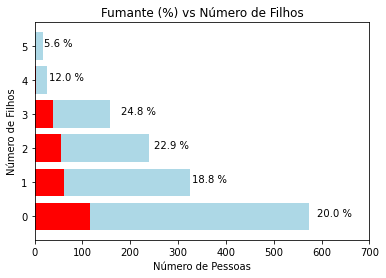

In [136]:
plt.barh(y = ['0','1','2','3','4','5'] , width = [num_f0,num_f1,num_f2,num_f3,num_f4,num_f5], color = 'lightblue')
plt.barh(y = ['0','1','2','3','4','5'] , width = [ex_f0,ex_f1,ex_f2,ex_f3,ex_f4,ex_f5] , color = 'red')

plt.xlim(0,700)


plt.text(20, '5','{:.1f} %'.format(f5_ex_rate*100))
plt.text(30 , '4','{:.1f} %'.format(f4_ex_rate*100)) 
plt.text(180 , '3','{:.1f} %'.format(f3_ex_rate*100))
plt.text(250 , '2','{:.1f} %'.format(f2_ex_rate*100))
plt.text(330 , '1','{:.1f} %'.format(f1_ex_rate*100))
plt.text (590, '0','{:.1f} %'.format(f0_ex_rate*100))

plt.title('Fumante (%) vs Número de Filhos')
plt.xlabel('Número de Pessoas')
plt.ylabel('Número de Filhos')

plt.show()

In [137]:
df.Regiao.value_counts() # número de pessoas em cada região

southeast    364
southwest    325
northwest    325
northeast    324
Name: Regiao, dtype: int64

In [138]:
num_se = len(df[df.Regiao == 'southeast'])
num_sw = len(df[df.Regiao == 'southwest'])
num_nw = len(df[df.Regiao == 'northwest'])
num_ne = len(df[df.Regiao == 'northeast'])


ex_se = len(df[(df.Regiao == 'southeast') & (df.Fumante == "yes")])
ex_sw = len(df[(df.Regiao == 'southwest') & (df.Fumante == "yes")])
ex_nw = len(df[(df.Regiao == 'northwest') & (df.Fumante == "yes")]) 
ex_ne = len(df[(df.Regiao == 'northeast') & (df.Fumante == "yes")])


se_ex_rate = ex_se/num_se
sw_ex_rate = ex_sw/num_sw
nw_ex_rate = ex_nw/num_nw
ne_ex_rate = ex_ne/num_ne


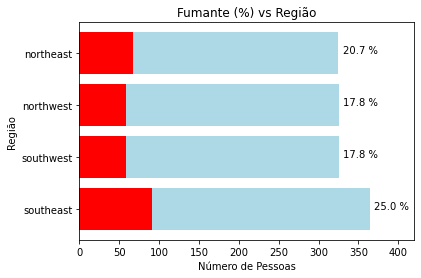

In [139]:
plt.barh(y = ['southeast','southwest','northwest','northeast'] , width = [num_se,num_sw,num_nw,num_ne], color = 'lightblue')
plt.barh(y = ['southeast','southwest','northwest','northeast'] , width = [ex_se,ex_sw,ex_nw,ex_ne] , color = 'red')

plt.xlim(0,420)


plt.text(370, 'southeast','{:.1f} %'.format(se_ex_rate*100))
plt.text(330 , 'southwest','{:.1f} %'.format(sw_ex_rate*100)) 
plt.text(330 , 'northwest','{:.1f} %'.format(nw_ex_rate*100))
plt.text(330 , 'northeast','{:.1f} %'.format(ne_ex_rate*100))


plt.title('Fumante (%) vs Região')
plt.xlabel('Número de Pessoas')
plt.ylabel ('Região')

plt.show()

In [140]:
df.Sexo.value_counts() # número de pessoas por sexo

male      676
female    662
Name: Sexo, dtype: int64

In [141]:
num_f_f = len(df[df.Sexo == 'female'])
num_f_m = len(df[df.Sexo == 'male'])

f_f_yes = len(df[(df.Sexo == 'female') & (df.Fumante == 'yes')])
f_m_yes = len(df[(df.Sexo == 'male') & (df.Fumante == 'yes')]) 

yes_f_f_rate = f_f_yes/num_f_f
yes_f_m_rate = f_m_yes/num_f_m

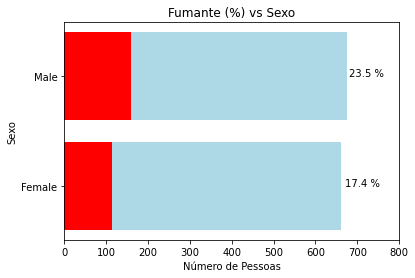

In [142]:
plt.barh(y = ['Female','Male'] , width = [num_f_f,num_f_m], color = 'lightblue')
plt.barh(y = ['Female','Male'] , width = [f_f_yes, f_m_yes] , color = 'red')

plt.xlim(0,800)


plt.text(670 , 'Female','{:.1f} %'.format(yes_f_f_rate*100))
plt.text(680 , 'Male','{:.1f} %'.format(yes_f_m_rate*100))

plt.title('Fumante (%) vs Sexo')
plt.xlabel('Número de Pessoas')
plt.ylabel('Sexo')

plt.show()

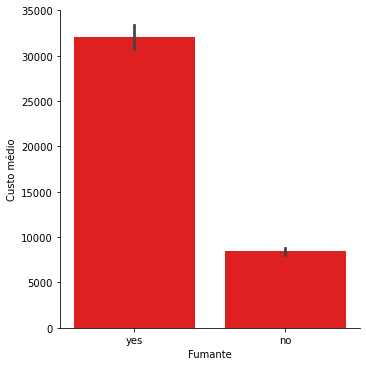

In [143]:
# custo médio de pessoas fumantes e de pessoas não fumantes  
sns.catplot(data = df , x = 'Fumante'  , y = 'Custos' , kind = 'bar' , color = 'red')
plt.plot([df[df.Fumante == 'yes']['Custos'].mean(),df[df.Fumante == 'no']['Custos'].mean()], linestyle = ' ',alpha = 0.8)
plt.ylabel('Custo médio')
plt.show()

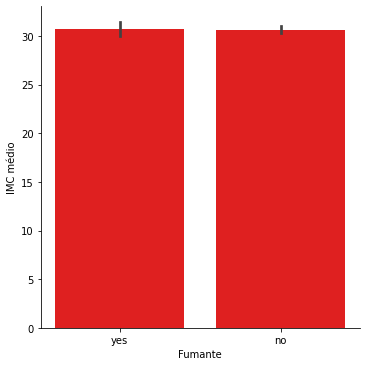

In [144]:
# IMC médio de pessoas fumantes e de pessoas não fumantes  
sns.catplot(data = df , x = 'Fumante'  , y = 'IMC' , kind = 'bar' , color = 'red')
plt.plot([df[df.Fumante == 'yes']['IMC'].mean(),df[df.Fumante == 'no']['IMC'].mean()],linestyle = ' ' , c ='k'
         , alpha = 0.8)
plt.ylabel('IMC médio')
plt.show()

In [161]:
df['Classificacao'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['IMC'] < 18.5, 'Classificacao'] = 'Underweight'
    col.loc[(col['IMC'] >= 18.5) & (col['IMC'] < 24.986), 'Classificacao'] = 'Normal Weight'
    col.loc[(col['IMC'] >= 25) & (col['IMC'] < 29.926), 'Classificacao'] = 'Overweight'
    col.loc[(col['IMC'] >= 30) & (col['IMC'] < 39.9), 'Classificacao'] = 'Obesity'
    col.loc[col['IMC'] >= 40, 'Classificacao'] = 'Severe Obesity'

In [162]:
df

,Idade,Sexo,IMC,Filhos,Fumante,Regiao,Custos,Classificacao
0,19,female,27.900,0,yes,southwest,16884.924000,Overweight
1,18,male,33.770,1,no,southeast,1725.552300,Obesity
2,28,male,33.000,3,no,southeast,4449.462000,Obesity
3,33,male,22.705,0,no,northwest,21984.470610,Normal Weight
4,32,male,28.880,0,no,northwest,3866.855200,Overweight
5,31,female,25.740,0,no,southeast,3756.621600,Overweight
6,46,female,33.440,1,no,southeast,8240.589600,Obesity
7,37,female,27.740,3,no,northwest,7281.505600,Overweight
8,37,male,29.830,2,no,northeast,6406.410700,Overweight
9,60,female,25.840,0,no,northwest,28923.136920,Overweight


In [164]:
df.Classificacao.value_counts() # número de pessoas por classificacao

Obesity           613
Overweight        386
Normal Weight     225
Severe Obesity     91
Underweight        20
Name: Classificacao, dtype: int64

In [163]:
num_under = len(df[df.Classificacao == 'Underweight'])
num_normal = len(df[df.Classificacao == 'Normal Weight'])
num_over = len(df[df.Classificacao == 'Overweight'])
num_obe = len(df[df.Classificacao == 'Obesity'])
num_severe = len(df[df.Classificacao == 'Severe Obesity'])


under = len(df[(df.Classificacao == 'Underweight') & (df.Fumante == "yes")])
normal = len(df[(df.Classificacao == 'Normal Weight') & (df.Fumante == "yes")])
over = len(df[(df.Classificacao == 'Overweight') & (df.Fumante == "yes")]) 
obe = len(df[(df.Classificacao == 'Obesity') & (df.Fumante == "yes")])
severe = len(df[(df.Classificacao == 'Severe Obesity') & (df.Fumante == "yes")])


under_rate = under/num_under
normal_rate = normal/num_normal
over_rate = over/num_over
obe_rate = obe/num_obe
severe_rate = severe/num_severe

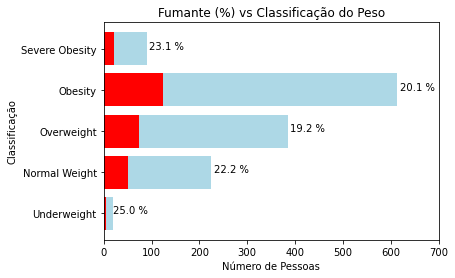

In [166]:
plt.barh(y = ['Underweight','Normal Weight','Overweight','Obesity','Severe Obesity'] , width = [num_under,num_normal,num_over,num_obe,num_severe], color = 'lightblue')
plt.barh(y = ['Underweight','Normal Weight','Overweight','Obesity','Severe Obesity'] , width = [under,normal,over,obe,severe] , color = 'red')

plt.xlim(0,700)


plt.text(20, 'Underweight','{:.1f} %'.format(under_rate*100))
plt.text(230 , 'Normal Weight','{:.1f} %'.format(normal_rate*100)) 
plt.text(390 , 'Overweight','{:.1f} %'.format(over_rate*100))
plt.text(620 , 'Obesity','{:.1f} %'.format(obe_rate*100))
plt.text(95 , 'Severe Obesity','{:.1f} %'.format(severe_rate*100))


plt.title('Fumante (%) vs Classificação do Peso')
plt.xlabel('Número de Pessoas')
plt.ylabel('Classificação')

plt.show()

Questão 9. Existe uma relação entre Custos e Idade das pessoas? 

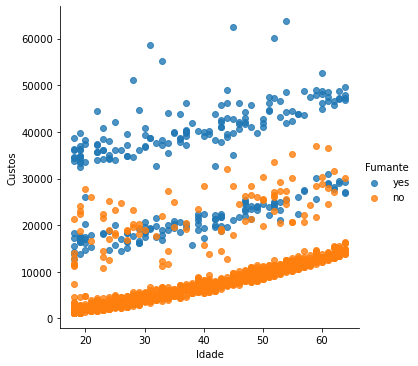

In [167]:
sns.lmplot(x = 'Idade', 
           y = 'Custos', 
           data = df,
           fit_reg = False,
           hue='Fumante')

Três classes:
- custos baixos e não fumantes
- custos médios, fumantes e não fumantes 
- custos mais altos e fumantes 

Questão 10. Existe uma relação entre IMC e Custos?

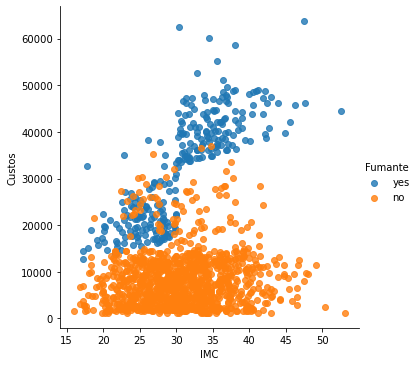

In [170]:
sns.lmplot(x = 'IMC', 
           y = 'Custos', 
           data = df,
           fit_reg = False,
           hue='Fumante')

Fumantes apresentam mais custos a medida que aumenta o IMC 

3. Preparação dos dados (Pré-processamento)

3.1. Tratamento das variáveis categóricas

In [180]:
# Codificando (Encoding) a variável categórica Região
df = pd.get_dummies(df, columns = ['Regiao'])

In [181]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Custos,Classificacao,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,female,27.900,0,yes,16884.92400,Overweight,0,0,0,1
1,18,male,33.770,1,no,1725.55230,Obesity,0,0,1,0
2,28,male,33.000,3,no,4449.46200,Obesity,0,0,1,0
3,33,male,22.705,0,no,21984.47061,Normal Weight,0,1,0,0
4,32,male,28.880,0,no,3866.85520,Overweight,0,1,0,0


In [182]:
# Codificando (Encoding) a variável categórica "Sexo"
df['Sexo'] = df['Sexo'].map({'female':1, 'male':0 })

In [183]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Custos,Classificacao,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,1,27.900,0,yes,16884.92400,Overweight,0,0,0,1
1,18,0,33.770,1,no,1725.55230,Obesity,0,0,1,0
2,28,0,33.000,3,no,4449.46200,Obesity,0,0,1,0
3,33,0,22.705,0,no,21984.47061,Normal Weight,0,1,0,0
4,32,0,28.880,0,no,3866.85520,Overweight,0,1,0,0


In [184]:
# Codificando (Encoding) a variável categórica "Fumante"
df['Fumante'] = df['Fumante'].map({'yes':1, 'no':0 })

In [185]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Custos,Classificacao,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,1,27.900,0,1,16884.92400,Overweight,0,0,0,1
1,18,0,33.770,1,0,1725.55230,Obesity,0,0,1,0
2,28,0,33.000,3,0,4449.46200,Obesity,0,0,1,0
3,33,0,22.705,0,0,21984.47061,Normal Weight,0,1,0,0
4,32,0,28.880,0,0,3866.85520,Overweight,0,1,0,0


In [186]:
df=df.drop(columns=["Classificacao"])

In [187]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Custos,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


3.2. Seleção das variáveis X

Questão 11. Existe correlação entre as variáveis?

<AxesSubplot:>

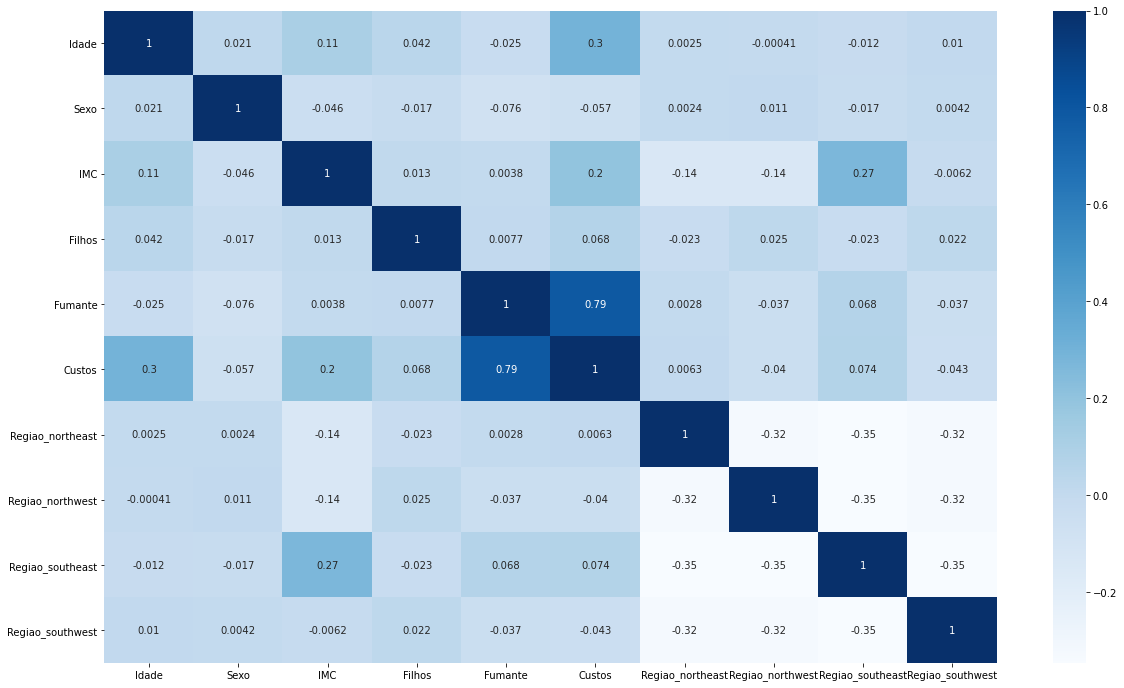

In [188]:
plt.figure(figsize=(20,12))
plt.rcParams.update({'font.size': 10})
sns.heatmap(df.corr(), annot=True, cmap='Blues') # criar um heatmap (mapa de calor)

Correlação entre custos e fumantes (0.79). Além das correlações entre custos e Idade (0.3) e entre custos e IMC (0.2). Confirmando os resultados das questões 9 e 10.   

3.2.1. Transformação da escala dos dados

In [189]:
df.head()

,Idade,Sexo,IMC,Filhos,Fumante,Custos,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


As variáveis IMC e Custos possuem escalas de grandezas distintas. Portanto, deixar as variáveis numa mesma escala para evitar que análises posteriores fiquem enviesadas para as variáveis de maior grandeza

In [190]:
X=df.drop(columns=['Fumante'])

In [191]:
X.head()

,Idade,Sexo,IMC,Filhos,Custos,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,1,27.900,0,16884.92400,0,0,0,1
1,18,0,33.770,1,1725.55230,0,0,1,0
2,28,0,33.000,3,4449.46200,0,0,1,0
3,33,0,22.705,0,21984.47061,0,1,0,0
4,32,0,28.880,0,3866.85520,0,1,0,0


In [192]:
sc = MinMaxScaler()

In [193]:
X[['Custos','IMC']] = sc.fit_transform(X[['Custos','IMC']])
X.head()

,Idade,Sexo,IMC,Filhos,Custos,Regiao_northeast,Regiao_northwest,Regiao_southeast,Regiao_southwest
0,19,1,0.321227,0,0.251611,0,0,0,1
1,18,0,0.479150,1,0.009636,0,0,1,0
2,28,0,0.458434,3,0.053115,0,0,1,0
3,33,0,0.181464,0,0.333010,0,1,0,0
4,32,0,0.347592,0,0.043816,0,1,0,0


3.2.2. Balanceamento da variável alvo (Fumante) 
- Gerar novas observações da classe minoritária usando o algoritmo SMOTE (Synthetic Minority Oversampling Technique). No caso do presente projeto, a classe minoritária é fumante (yes = 1).

In [194]:
y=df["Fumante"]

In [199]:
y

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      1
12      0
13      0
14      1
15      0
16      0
17      0
18      0
19      1
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      1
30      1
31      0
32      0
33      0
34      1
35      0
36      0
37      0
38      1
39      1
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      1
50      0
51      0
52      1
53      1
54      0
55      1
56      0
57      1
58      1
59      0
60      0
61      0
62      0
63      0
64      1
65      0
66      0
67      0
68      0
69      1
70      1
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      1
83      0
84      1
85      1
86      1
87      0
88      0
89      0
90      0
91      0
92      1
93      0
94      1
95      0
96      0
97      0
98      1
99      1


In [195]:
smote = SMOTE()

In [196]:
X_balanceado, y_balanceado = smote.fit_resample(X, y)

In [197]:
y_balanceado = pd.Series(y_balanceado, name=y.name)
y_balanceado.head(1)

0    1
Name: Fumante, dtype: int64

Verificar se gerou novas observações da classe minoritária   

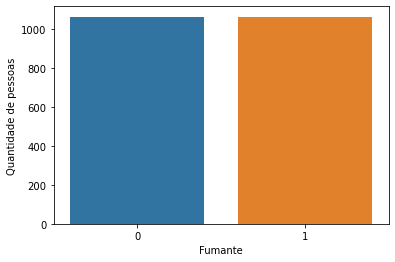

In [198]:
ax = sns.countplot(x=y_balanceado)
ax.set_ylabel("Quantidade de pessoas")
ax.set_xlabel("Fumante");

4. Modelagem (Modelo de Classificação, pois a variável alvo (Fumante) é binária 0 ou 1)

4.1. Geração (criação) dos modelos e avaliação dos modelos 

4.1.1. Primeiro modelo (Regressão Logística)

In [203]:
classifierLR = LogisticRegression(max_iter=500, random_state = 42)

4.1.1.1. Dados desbalanceados

In [204]:
# Creating Logistic Regression list of metrics
logistic_regression_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression_sem_balancear.append(cv_result[i].mean())

In [205]:
# Printing the Logistic Regression metrics
logistic_regression_sem_balancear

[0.890158231399394,
 0.8524915550490999,
 0.5697089947089948,
 0.6781863533292104,
 0.9841434281347876]

4.1.1.2. Dados balanceados

In [206]:
# Creating Logistic Regression list of metrics
logistic_regression_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X_balanceado, y_balanceado, cv=10,
                       # Printing the Logistic Regression metrics
                              scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression_balanceado.append(cv_result[i].mean())

In [207]:
# Printing the Logistic Regression metrics
logistic_regression_balanceado

[0.9699353352821332,
 0.9573655311180446,
 0.9841121495327103,
 0.9703452094282691,
 0.9916373605533615]

4.1.2. Segundo modelo (Naive Bayes)

In [208]:
classifierNB = GaussianNB()

4.1.2.1. Dados desbalanceados

In [209]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes_sem_balancear.append(cv_result[i].mean())

In [210]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes_sem_balancear

[0.9021153630344518,
 0.7960282735200277,
 0.7043650793650794,
 0.7443758924172459,
 0.9735144063503259]

4.1.2.2. Dados balanceados

In [211]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes_balanceado.append(cv_result[i].mean())

In [212]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes_balanceado

[0.9192023208432989,
 0.9322331350665227,
 0.9043554928584024,
 0.9171500135867939,
 0.9770023256355571]

4.1.3. Terceiro modelo (Random Forest - RF)

In [213]:
classifierRF = RandomForestClassifier(random_state = 42)

4.1.3.1. Dados desbalanceados

In [214]:
# Creating Random Forest list of metrics
random_forest_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest_sem_balancear.append(cv_result[i].mean())

In [215]:
# Printing the RF metrics
random_forest_sem_balancear

[0.9596509931545281,
 0.8828403300226567,
 0.9343915343915343,
 0.9059838644333729,
 0.9925805453159535]

4.1.3.2. Dados balanceados

In [216]:
# Creating Random Forest list of metrics
random_forest_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest_balanceado.append(cv_result[i].mean())

In [217]:
# Printing the RF metrics
random_forest_balanceado

[0.9699331207370008,
 0.950957887069522,
 0.9915711514724034,
 0.9706726944614911,
 0.994473995468504]

4.1.4. Quarto modelo (Decision Tree)

In [218]:
classifierDT = DecisionTreeClassifier(random_state = 42)

4.1.4.1. Dados desbalanceados

In [219]:
# Creating Decision Tree list of metrics
decision_tree_sem_balancear = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X, y, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree_sem_balancear.append(cv_result[i].mean())

In [220]:
# Printing the Decision Tree metrics
decision_tree_sem_balancear

[0.9678543373358771,
 0.9200435082159221,
 0.9272486772486774,
 0.9222273242687186,
 0.9528061407756347]

4.1.4.2. Dados Balanceados

In [221]:
# Creating Decision Tree list of metrics
decision_tree_balanceado = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_balanceado, y_balanceado, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree_balanceado.append(cv_result[i].mean())

In [222]:
# Printing the Decision Tree metrics
decision_tree_balanceado

[0.9572459916733103,
 0.9596199744633831,
 0.9549462175983072,
 0.9570712888064467,
 0.9572562158349497]

4.2. Comparar as métricas dos modelos

In [224]:
metricas = (pd.DataFrame([logistic_regression_sem_balancear,logistic_regression_balanceado,naive_bayes_sem_balancear,naive_bayes_balanceado,random_forest_sem_balancear, random_forest_balanceado, decision_tree_sem_balancear,decision_tree_balanceado],
                        index=['Logistic Regression sem balancear','Logistic Regression balanceado','Naive Bayes sem balancear','Naive Bayes balanceado','Random Forest sem balancear', 'Random Forest balanceado','Decision Tree sem balancear','Decision Tree balanceado'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metricas

,Accuracy,Precision,Recall,F1 Score,AUROC
Logistic Regression sem balancear,89.02,85.25,56.97,67.82,98.41
Logistic Regression balanceado,96.99,95.74,98.41,97.03,99.16
Naive Bayes sem balancear,90.21,79.60,70.44,74.44,97.35
Naive Bayes balanceado,91.92,93.22,90.44,91.72,97.70
Random Forest sem balancear,95.97,88.28,93.44,90.60,99.26
Random Forest balanceado,96.99,95.10,99.16,97.07,99.45
Decision Tree sem balancear,96.79,92.00,92.72,92.22,95.28
Decision Tree balanceado,95.72,95.96,95.49,95.71,95.73


In [225]:
metricas['AUROC'].sort_values(ascending=False)

Random Forest balanceado             99.45
Random Forest sem balancear          99.26
Logistic Regression balanceado       99.16
Logistic Regression sem balancear    98.41
Naive Bayes balanceado               97.70
Naive Bayes sem balancear            97.35
Decision Tree balanceado             95.73
Decision Tree sem balancear          95.28
Name: AUROC, dtype: float64

- Melhor modelo: Random Forest balanceado
- Modelos sem balancear: não apresentaram boas performances  

4.3. Tunagem de hiperparâmetros do Melhor Modelo (RF)

In [226]:
tuned_classifierRF = RandomForestClassifier()

# Parameters to be used
params_RF = {'min_samples_leaf':[1,2,3,],
                 'max_depth':[None,1,2],
                 'criterion':['gini','entropy']}

gs_RF = GridSearchCV(estimator=tuned_classifierRF, 
                      param_grid=params_RF, 
                      cv=10, 
                      scoring='recall')

# Fitting the model to the training set
gs_RF.fit(X_balanceado, y_balanceado)

# Printing the best score adquired from the tunning
best_recall = gs_RF.best_score_
print("Best Recall Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_RF.best_params_
print("Best Parameters:", best_parameters)

Best Recall Score: 99.53 %
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}


In [227]:
tuned_classifierRF = RandomForestClassifier()

# Parameters to be used
params_RF = {'n_estimators':[100,200],
             'min_samples_leaf':[1,2,3],
             'max_depth':[None,1,2],
             'criterion':['gini','entropy']}

gs_RF = GridSearchCV(estimator=tuned_classifierRF, 
                      param_grid=params_RF, 
                      cv=10, 
                      scoring='recall')

# Fitting the model to the training set  
gs_RF.fit(X_balanceado, y_balanceado)

# Printing the best score adquired from the tunning
best_recall = gs_RF.best_score_
print("Best Recall Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_RF.best_params_
print("Best Parameters:", best_parameters)

Best Recall Score: 99.44 %
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 200}


In [228]:
tuned_classifierRF = RandomForestClassifier()

# Parameters to be used
params_RF = {'n_estimators':[100,200,300],
             'min_samples_leaf':[1,2,3],
             'max_depth':[None,1,2],
             'criterion':['gini','entropy']}

gs_RF = GridSearchCV(estimator=tuned_classifierRF, 
                      param_grid=params_RF, 
                      cv=10, 
                      scoring='recall')

# Fitting the model to the training set  
gs_RF.fit(X_balanceado, y_balanceado)

# Printing the best score adquired from the tunning
best_recall = gs_RF.best_score_
print("Best Recall Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_RF.best_params_
print("Best Parameters:", best_parameters)

Best Recall Score: 99.44 %
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 100}


4.4. Treinando com todos os dados de treino
- Treinar (ajustar) o melhor modelo (RF balanceado) com os melhores hiperparâmetros

In [229]:
RF = RandomForestClassifier(min_samples_leaf=3, max_depth=None, 
                             criterion='entropy', random_state=42)

RF.fit(X_balanceado, y_balanceado)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3, random_state=42)